# Plucked String
## Computing the time evolution of the wavefunction numerically
Here we explore the wavefunction as it evolves in time. This is not so easy to do analytically, since the expansion coefficientc $c_n$ do not quite have a simple form, or a specific cutoff, and so an analytic solution for the wavefunction at some later $t$ becomes very difficult.

The standard solutions to the infinite square well, on the domain $0<x<a$, is given by:
$$
\left<x|\psi_n\right>=\psi_n(x) = \sqrt{\frac{2}{a}} \sin\left(\frac{n\pi x}{a}\right) \\
E_n = \frac{n^2 \pi^2 \hbar^2}{2ma^2}
$$
For this problem, we have the initial wave function given as:
$$
\Psi(x,0) = \left\{ \begin{matrix} A' x, \qquad &\mathrm{if\ } 0\le x \le a/2, \\ A'(a-x), \qquad &\mathrm{if\ } a/2\le x \le a \end{matrix}\right.
$$
which leads to the the solution for the expansion coefficients, $c_n = \left<\psi_n \right.\left|\Psi(t=0)\right>$:
$$
c_n = \frac{4\sqrt{6}}{n^2\pi^2}\left(-1\right)^{\frac{n-1}{2}},\qquad \mathrm{for\ odd}\ n\ \mathrm{only}
$$

We first import the numpy and matplotlib.pyplot packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next we want to define a function for $c_n$. It has to return zero for all even $n$, and return the correct $c_n$ for all odd $n$. By writing this function without any "if" statements, we can pass a numpy list of numbers and the function will automatically return a list of $c_n$ values. Doing this allows us to write code that runs a lot faster. We must be sure though to not ask for $n=0$, since that results in divide by zero error.

In [2]:
def c(n):
    sign =(n%2)*(-1)**((n+3)/2) # 
    c_n = sign*4*np.sqrt(6)/(n*n*np.pi*np.pi)
    return(c_n)

It makes sense to do a quick check of our function. We know the sum of all $c_n^2$ should be one.

In [12]:
# This is the slow way of checking. Since your computer
# really really fast, you still get the answer almost immediately.
sum =0
for n in range(1,100):
    sum += c(n)**2
print sum
#
# The faster way to code the same thing uses Numpy tricks:
nl = np.array(range(1,7000))
print np.sum(c(nl)**2)

0.999999835777
1.0


We now need to write a function that encode the time dependent wave-function itself. To do this, we first need a function that returns the energy of the system. We simplify things a little by choosing $m=1$ and $\hbar=1$, which essentially is a choice of units. We pass the value for the width of the well, $a$.

Our first version of this function is fairly straight forward, but since we end up calling this function a lot when making plots, we find that in this case the slowness of it becomes noticable. It takes about 2 minutes to make the plots. A faster version of the function is written right below, which does the same thing but again uses the Numpy speedups. This version makes the plots in about 2 seconds on my system.

In [13]:
def E(n,a):
    return(n*n*np.pi*np.pi/(2.*a*a)) # We set m/hbar =1

def psi(x,t,a):
    if x<=0 or x>=a:
        return(0)
    norm = np.sqrt(2/a)
    out = 0
    for n in range(1,100):
        term_n = c(n)*norm*np.sin(x*n*np.pi/a)
        phase = np.exp(-1.j*E(n,a)*t)
        out+= term_n * phase
    return(out)

In [14]:
def E(n,a):
    return(n*n*np.pi*np.pi/(2.*a*a)) # We set m/hbar =1

def psi_f(x,t,a):
    norm =np.sqrt(2/a)
    out = 0
    n_r = np.array(range(1,100))
    out = c(n_r)*norm*np.sin(x*n_r*np.pi/a)*np.exp(-1.j*E(n_r,a)*t)
    s = np.sum(out)
    return(s)

Now below we make plots of the real part of the wave function, so see how it evolves. Note that since this is only the *real* part, we do not expect these plots to remain normalized. Below this we do the same for the imaginary part of the wave function, and finally the absolute of the wave function. In that last set of plots, the norm of the curves *does* stay equal to one.

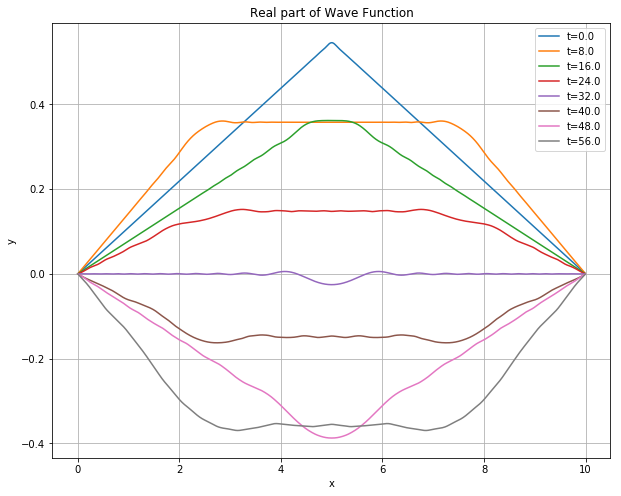

In [15]:
plt.figure(figsize=(10,8))
x_r = np.arange(0,10,0.01)
for t in np.arange(0.,64.,8.):
    y_p = [np.real(psi_f(x,t,10.)) for x in x_r]
    plt.plot(x_r,y_p,label="t={}".format(t))
    plt.legend() 
    plt.title("Real part of Wave Function")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True,which='both')
plt.show()

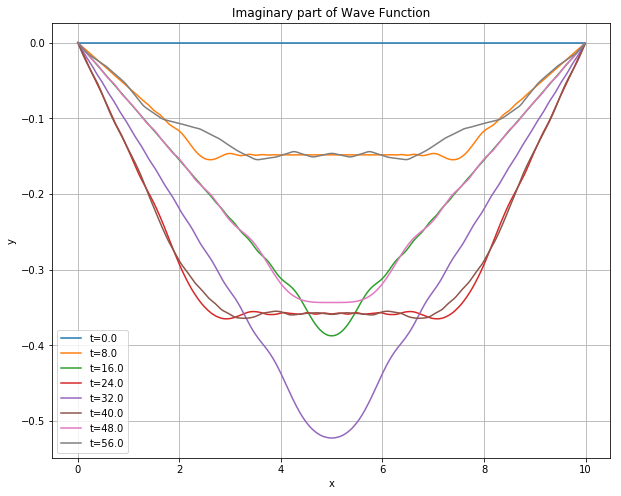

In [16]:
plt.figure(figsize=(10,8))
x_r = np.arange(0,10,0.01)
for t in np.arange(0.,64.,8.):
    y_p = [np.imag(psi_f(x,t,10.)) for x in x_r]
    plt.plot(x_r,y_p,label="t={}".format(t))
    plt.legend() 
    plt.title("Imaginary part of Wave Function")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True,which='both')
plt.show()

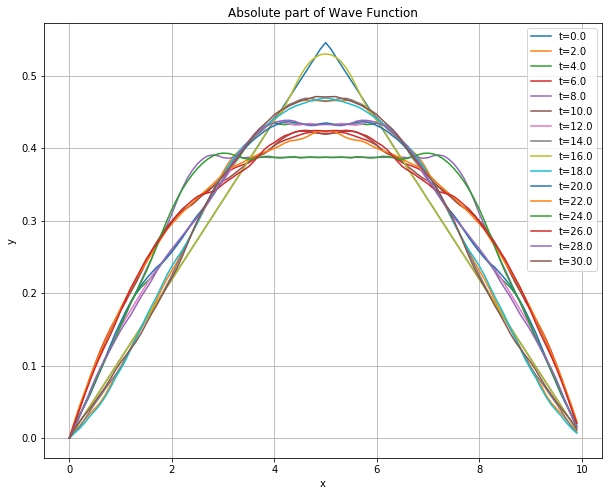

In [18]:
plt.figure(figsize=(10,8))
x_r = np.arange(0,10,0.1)
for t in np.arange(0.,32.,2.):
    y_p = [np.abs(psi(x,t,10.)) for x in x_r]
    plt.plot(x_r,y_p,label="t={}".format(t))
    plt.legend() 
    plt.title("Absolute part of Wave Function")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True,which='both')
plt.show()